# Classificacao_Veiculos

Aluno: mig
Descrição: Versão refatorada para estudo — nomes padronizados e comentários ajustados.



In [1]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 4.8 MB/s eta 0:00:00


In [2]:
!pip install inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

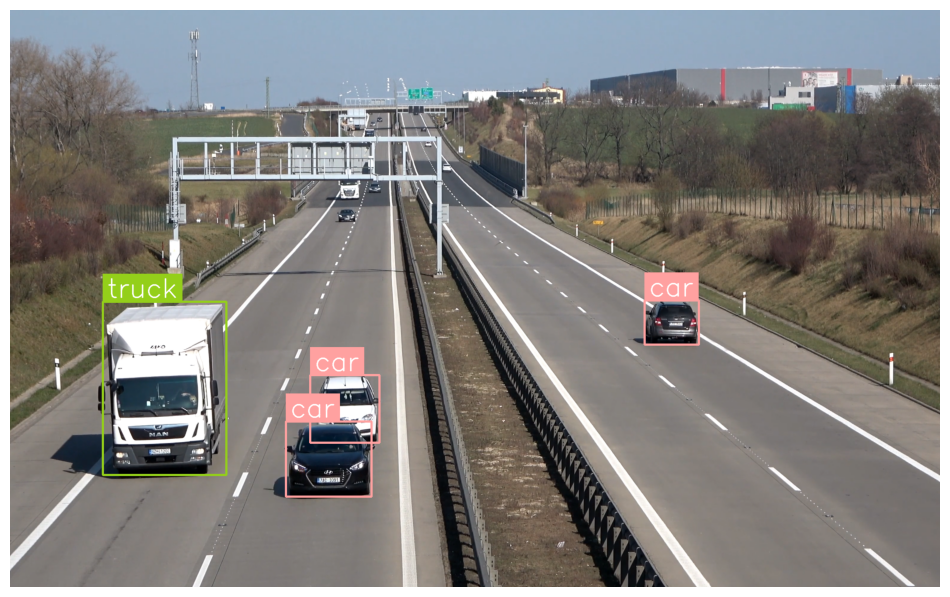

In [4]:
from inference import get_model
import supervision as sv
from inference.core.utils.image_utils import load_image_bgr

image = load_image_bgr('https://media.roboflow.com/inference/vehicles.png')
model = get_model(model_id='yolov8n-640')
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)

annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)

In [7]:
def count_cars(detections: sv.Detections) -> int:
    car_count = 0
    for label in detections.data['class_name']:
        if label == 'car':
            car_count += 1
    return car_count

# Use the function to count cars in the results
number_of_cars = count_cars(results)
print(f"Number of cars detected: {number_of_cars}")

Number of cars detected: 3
